# 이미지 불러오기 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("슝=3")

슝=3


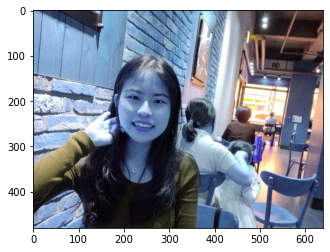

In [2]:
import os
my_image_path=os.getenv('HOME')+'/aiffel/camera_sticker/images/yejin.jpg'
img_bgr=cv2.imread(my_image_path)
img_bgr=cv2.resize(img_bgr, (640,480))
img_show=img_bgr.copy()
plt.imshow(img_bgr)
plt.show()

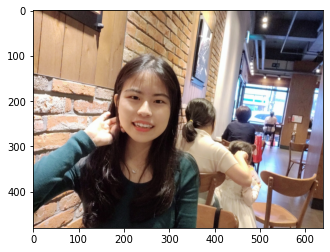

In [3]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# 얼굴 검출 & 랜드마크 검출 하기

In [4]:
import dlib
detector_hog=dlib.get_frontal_face_detector() #detector 선언
print("슝=3")

슝=3


In [5]:
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
dlib_rects=detector_hog(img_rgb, 1)
print("슝=3")

슝=3


rectangles[[(182, 168) (311, 297)]]


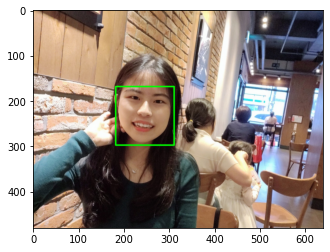

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [8]:
list_landmarks=[]
for dlib_rect in dlib_rects:
    points=landmark_predictor(img_rgb,dlib_rect)
    list_points=list(map(lambda p:(p.x, p.y),points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


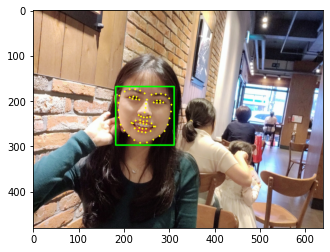

In [9]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show,point,2,(0,255,255),-1)
        
img_show_rgb=cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 스티커 적용 위치 확인하기

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x=landmark[30][0]
    y=landmark[30][1]
    w=dlib_rect.width()
    h=dlib_rect.height()
    print('(x,y):(%d,%d)'%(x,y))
    print('(w,h):(%d,%d)'%(w,h))

(246, 225)
(x,y):(246,225)
(w,h):(130,130)


In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [12]:
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (181,160)


# 스티커 회전하기

In [13]:
import math
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

-10.124671655397817


(130, 130, 3)


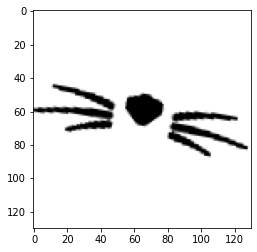

In [14]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

# 스티커 적용하기

In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)

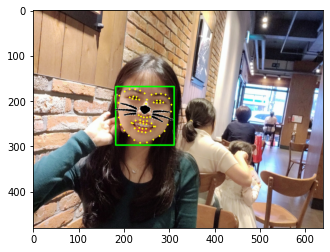

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 스티커 투명도 조절해서 원본 이미지에 적용

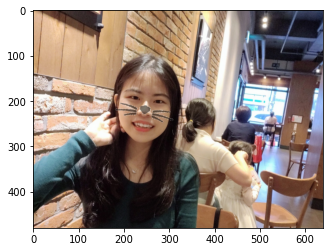

In [274]:
sticker_area = img_bgr[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]]
img_bgr[refined_y:refined_y+img_rotate.shape[0], refined_x:refined_x+img_rotate.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## - 스티커는 코의 위치를 참조해서 설정했다. 하지만 그 다음에 스티커 회전과 투명도 조절하는 점이 어려웠다.

## - 스티커 회전은 콧등인 27번 점과 위치 설정할 때 사용하던 30번 점의 각도를 이용하여 조절하였다. 또한, 투명도는 50%로 바꿨다. 

## - 하나의 사진이 아닌 여러가지 사진들을 적용해서 스티커가 잘 붙는지 확인했다.

<img src='image1.JPG'>

## - 코에 그림자가 져서 그런지 각도를 조금 이상하게 잡았다.

<img src='image2.JPG'>

## - 조명을 어둡게 했는데도 스티커가 잘 붙는다. 각도가 이상하게 된 것은 아쉽다.

<img src='image3.JPG'>

## - 멀리서 찍었는데 스티커가 잘 붙는다.

<img src='image4.JPG'>

## - 각도를 달리했는데 스티커가 잘 붙는다.

## - 조명과 각도와 카메라 거리를 달리해도 스티커가 다 잘 생긴다는 것을 확인했다. 코에 그림자가 지면 스티커의 각도가 이상하게 잡혀서 다른 방법을 사용해야 될 것 같다. 